# Expected solution for a Radial Advection Test

Following Kannan et al. 2018.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define initial parameter values for analytical solution

In [2]:
# Section 3.1 of Kannan et al 2018
# Initial values of params

A0 = 40.
r0 = 1.2
sigma = 0.1
c = 1.

### Define a function that computes the radius with time

In [3]:
#define a simple function that gives radius with time
def r_t(t):
    return c*t + r0

### Define a function that gives the expected pulse amplitude with time.

In [4]:
#define a function that provides the expected amplitude
#as a function of time
def Er_Amplitude(t):
    return A0*r0/r_t(t)

### Define a function that gives the expected solution as a function of position and time

In [5]:
#define a function to return the expected photon number density
def Er_xyt(x,y,t):
    A_t = Er_Amplitude(t)  #amplitude of gaussian pulse
    rt = r_t(t)            #current radius of gaussian pulse
    r = (x**2 + y**2)**0.5 #radial position in x,y
    #print(rt)
    return A_t*np.exp(-0.5*((r-rt)/sigma)**2)
    

### Make a panel of Figure 1 from Kannan et al 2018

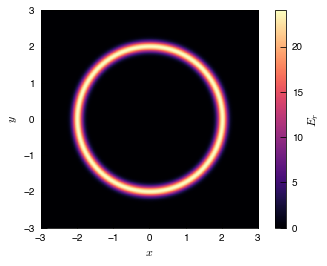

In [6]:
N = 512
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
xx, yy = np.meshgrid(x,y)

t = 0.8

Er = Er_xyt(xx,yy,t)

plt.imshow(Er,cmap="magma",extent=[-3,3,-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
cbar = plt.colorbar()
cbar.set_label(r'$E_r$')

## Make a panel of Figure 2 from Kannan et al 2018

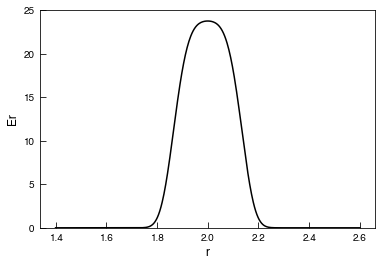

In [7]:
t_arr = np.linspace(0.2,1.4,N) #Time span that makes r -> 2.6 as seen in the figure
r_arr = []

for j in t_arr:                #Create r_arr for plotting
    r_arr.append(r_t(j))       #Decided to use your function r_t...useful when c != 1

Er_arr = Er[84] #I feel like I should be averaging or doing something different here

plt.plot(r_arr, Er_arr, color='k')
plt.ylim(top=25)
plt.ylim(bottom=0)
plt.xlabel('r')
plt.ylabel('Er')
plt.show()

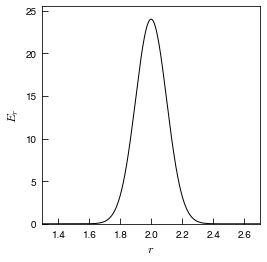

In [17]:
r_arr = (xx**2 + yy**2)**0.5
r_arr_flat = r_arr.flatten()
xi = r_arr_flat.argsort()
Er_flat = Er.flatten()
plt.plot(r_arr_flat[xi],Er_flat[xi],color="0",linewidth=1)
plt.xlim([1.3,2.7])
plt.ylim([0,25.5])
plt.gca().set_aspect((2.7-1.3)/25.5)
plt.xlabel(r'$r$')
plt.ylabel(r'$E_r$')
plt.savefig('rad_advection_test.png',dpi=500)

In [ ]:
# Energy, Flux, Arrays, Tensors
# Not necessary for this problem but useful in the future

#F_r  
#abs_F_r = c * E_r
#f = np.abs(F_R)/ (c_redu * E_r)
#f = 1.
#chi = (3. + (4. * f)**2) / (5. + 2. * np.sqrt(4. - (3. * f)**2))
#D_tensor = 
#P_r = E_r * D_tensor
#U_arr = np.array([E_r, F_r])